<a href="https://colab.research.google.com/github/SixDevelop/Intelligent_system_hw1/blob/main/2_nd_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритмы уменьшения размерности

Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold

Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf).

Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [ ]:
! pip install MulticoreTSNE umap-learn dataget wurlitzer gensim

In [ ]:
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true


#Импорты

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dataget
import time
import gensim.downloader as api
from scipy import io
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

from matplotlib.figure import Figure 
from matplotlib.axes import Axes
from numpy import ndarray
import matplotlib.gridspec as gridspec

#Добавление датасетов


In [14]:
mnist_dataset = load_digits()
mnist = pd.DataFrame(mnist_dataset.data)

In [ ]:
_, __, f_mnist, f_mnist_target = dataget.image.fashion_mnist().get()
f_mnist = f_mnist.reshape(-1, 28*28)

In [8]:
mat = io.loadmat('COIL20.mat?raw=true')
coil20 = mat['X']

In [9]:
google_news = api.load("word2vec-google-news-300").vectors
google_news = google_news[:30000]

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [16]:
datasets = [
  ("COIL", coil20, mat['Y']),
  ("MNIST", mnist, mnist_dataset.target),
  ("F-MNIST", f_mnist, f_mnist_target),
  ("Google", google_news, None)
]

# Алгоритмы

In [11]:
algorithms = [
  ("UMAP", UMAP(random_state = 2)),
  ("TSNE", TSNE(n_jobs=-1, random_state=2)),
  ("PCA", PCA(n_components=2))
]

In [17]:
def plt_gr(datasets: list, algorithms: list):
  fig = plt.figure(figsize=(17, 17), constrained_layout=False)
  spec = gridspec.GridSpec(3, 4, wspace=0.0, hspace=0.0)

  counter = 0

  for i in range(len(algorithms)):
    for j in range(len(datasets)):

      ax = fig.add_subplot(spec[counter])
      ax.set_xlabel(datasets[j][0])
      ax.xaxis.set_label_position('top')
      ax.set_ylabel(algorithms[i][0])

      print(f"Dataset: {datasets[j][0]} ({datasets[j][1].shape})")
      print(f"Algorithm: {algorithms[i][0]}")
      start = time.time()
      embeddings = algorithms[i][1].fit_transform(datasets[j][1])
      ax.scatter(embeddings[:, 0], embeddings[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
      ax.set_yticklabels([])
      ax.set_xticklabels([])
      ax.tick_params(left = False, bottom=False)
      print(f"Time: {time.time() - start} s")
      print("=====================================")
      counter += 1

Dataset: COIL ((1440, 1024))
Algorithm: UMAP
Time: 7.84757924079895 s
Dataset: MNIST ((1797, 64))
Algorithm: UMAP
Time: 8.571746349334717 s
Dataset: F-MNIST ((10000, 784))
Algorithm: UMAP
Time: 58.98352265357971 s
Dataset: Google ((30000, 300))
Algorithm: UMAP
Time: 50.62257242202759 s
Dataset: COIL ((1440, 1024))
Algorithm: TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time: 9.762698411941528 s
Dataset: MNIST ((1797, 64))
Algorithm: TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time: 14.065168857574463 s
Dataset: F-MNIST ((10000, 784))
Algorithm: TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time: 119.21331262588501 s
Dataset: Google ((30000, 300))
Algorithm: TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time: 754.6745502948761 s
Dataset: COIL ((1440, 1024))
Algorithm: PCA
Time: 0.3536508083343506 s
Dataset: MNIST ((1797, 64))
Algorithm: PCA
Time: 0.04852867126464844 s
Dataset: F-MNIST ((10000, 784))
Algorithm: PCA
Time: 1.3049592971801758 s
Dataset: Google ((30000, 300))
Algorithm: PCA
Time: 0.822188138961792 s


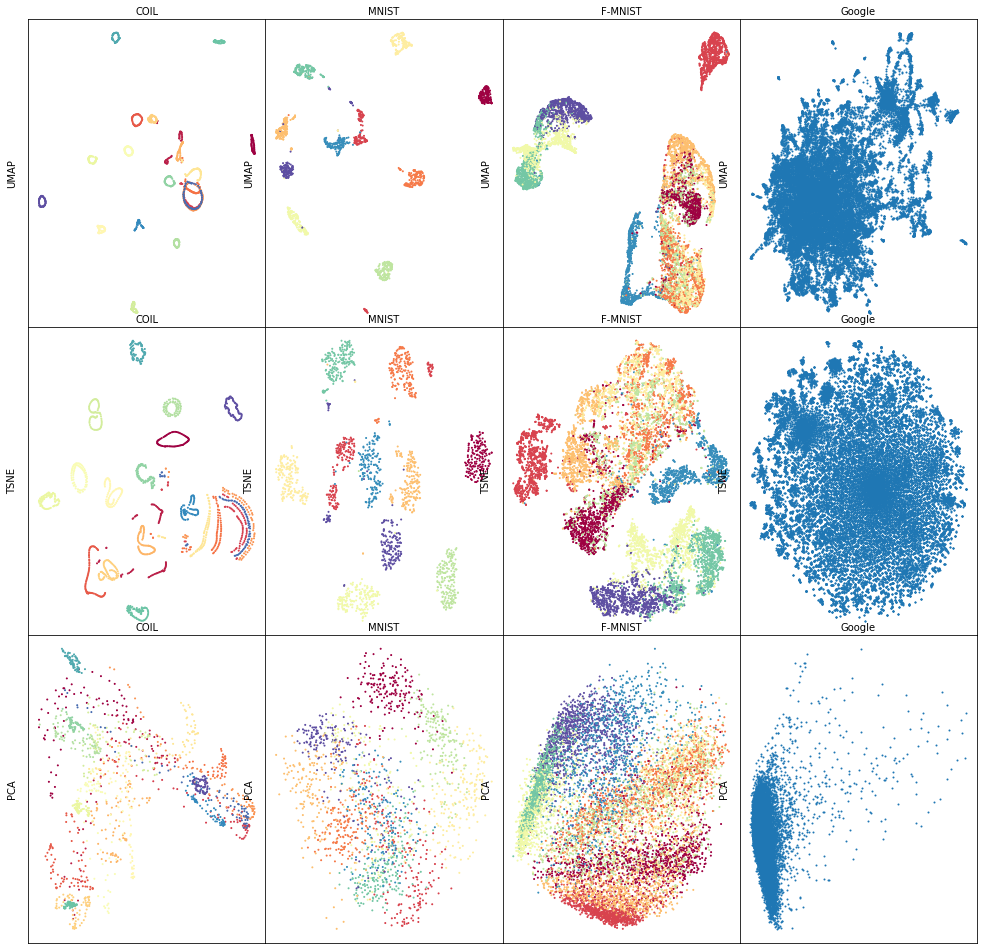

In [18]:
plt_gr(datasets, algorithms)